In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Loaded the diabetes dataset from sklearn datasets

In [2]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state = 2501)

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
train_r2 = lasso.score(X_train,y_train)
test_r2 = lasso.score(X_test,y_test)
print("The training R2 with default parameter is ", train_r2)
print("The test R2 with default parameter is ", test_r2)

The training R2 with default parameter is  0.37454569448410613
The test R2 with default parameter is  0.3193506509873977


This model uses 10 features. The name of these features are age, sex, body mass index (bmi), average blood
pressure (bp), and six blood serum measurements ( s1, s2, s3, s4, s5, s6)

In [4]:
import numpy as np
diabetes_data = np.genfromtxt("diabetes.data",usecols=np.arange(10),skip_header=1)
diabetes_target = np.genfromtxt("diabetes.data", usecols=10, dtype='int',skip_header=1)
#diabetes = np.genfromtxt("diabetes.data", names=True)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(diabetes_data, diabetes_target, random_state =2501)

In [6]:
lasso = Lasso().fit(X_train, y_train)
train_r2 = lasso.score(X_train,y_train)
test_r2 = lasso.score(X_test,y_test)
print("The training R2 with default parameter on original diabetes dataset  is ", train_r2)
print("The test R2 with default parameter on original diabetes dataset  is ", test_r2)

The training R2 with default parameter on original diabetes dataset  is  0.5482880544177613
The test R2 with default parameter on original diabetes dataset  is  0.41318465448011765


The training and test R2 seems better with the original diabetes dataset compared to the one from sklearn.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
lasso = Lasso().fit(X_train_scaled, y_train)
train_r2 = lasso.score(X_train_scaled,y_train)
test_r2 = lasso.score(X_test_scaled,y_test)
print("The training R2 with default parameter and scaled data on original diabetes dataset is ", train_r2)
print("The test R2 with default parameter and scaled data  on original diabetes dataset is ", test_r2)

The training R2 with default parameter and scaled data on original diabetes dataset is  0.5486303084923339
The test R2 with default parameter and scaled data  on original diabetes dataset is  0.4142659260246696


Current results are closer to item6 than item3. The expectation fails even though the data in item3 and item8 were normalised as data in item3 was normalised by mean centered and scaled by the standard deviation times `n_samples` and data in item8 was normalised using StandardScaler that scale the features by removing the mean and scaling to unit variance.

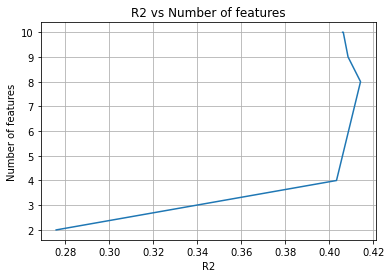

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

values = [0.0001,0.001,0.01,0.1,1,10,25]
r2 = list()
num_coef = list()
for a in values:
    
    lasso = Lasso(alpha = a).fit(X_train_scaled, y_train)
    test_r2 = lasso.score(X_test_scaled,y_test)
    r2.append(test_r2)
    num_coef.append(np.sum(lasso.coef_ != 0))

# print(values)
# print(r2)
# print(num_coef)

# print(num_coef)
# lasso.coef_
plt.title("R2 vs Number of features")
plt.xlabel("R2")  
plt.ylabel("Number of features")
plt.plot(r2,num_coef)
plt.grid()
plt.show()

Here we can chose the point with 8 number of coef as it has the best test r2(0.4133) value on the curve.
Lets try using validation set to be sure.

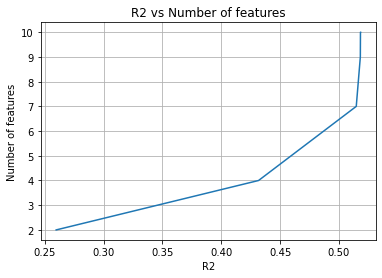

In [10]:
X_train_pr , X_valid, y_train_pr, y_valid = train_test_split(X_train_scaled, y_train, random_state = 2501)
#print(X_train_pr.shape[0], X_valid.shape[0],X_test.shape[0])
values = [0.0001,0.001,0.01,0.1,1,10,25]
r2 = list()
num_coef = list()
for a in values:
    
    lasso = Lasso(alpha = a).fit(X_train_pr, y_train_pr)
    test_r2 = lasso.score(X_valid,y_valid)
    r2.append(test_r2)
    num_coef.append(np.sum(lasso.coef_ != 0))

# print(values)
# print(r2)
# print(num_coef)

# print(num_coef)
# lasso.coef_
plt.title("R2 vs Number of features")
plt.xlabel("R2")  
plt.ylabel("Number of features")
plt.plot(r2,num_coef)
plt.grid()
plt.show()

Unlike the previous graph, this time the best point on graph is with 0.5146 test r2 and num of coef = 7. 
Lets try cross-validation on training set to find best parameter

In [11]:
from sklearn.model_selection import cross_val_score
best_score = 0

for a in values:
    lasso = Lasso(alpha=a)
    scores = cross_val_score(lasso, X_train, y_train, cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_alpha = a
        
lasso = Lasso(alpha= best_alpha).fit(X_train,y_train)
train_r2 = lasso.score(X_train,y_train)
test_r2 = lasso.score(X_test,y_test)
num_coef = np.sum(lasso.coef_ != 0)

print("The training r2 is ", train_r2, ", the test r2 is ", test_r2, "\n and the number of coefficient used are ",num_coef)


The training r2 is  0.5556893257881077 , the test r2 is  0.4073393177934208 
 and the number of coefficient used are  10


Now, lets split the training set in training proper and validation set for inductive conformal predictor

In [12]:
X_train,X_test,y_train,y_test = train_test_split(diabetes_data, diabetes_target, random_state =2501)
X_train_pr, X_valid, y_train_pr, y_valid = train_test_split(X_train,y_train, test_size = 99, random_state = 2501)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pr)
X_train_pr_scaled = scaler.transform(X_train_pr)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [13]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_pr_scaled,y_train_pr)

y_pred_train = lasso.predict(X_train_pr_scaled)

y_pred_valid = lasso.predict(X_valid_scaled)
y_pred_test = lasso.predict(X_test_scaled)

#conf_valid = abs(y_valid - y_pred_valid)
conf_valid = abs(y_train_pr - y_pred_train)
np.sort(conf_valid)

#for significance level 5%
k= int(np.ceil((1-0.05)*(len(y_valid)+1)))
interval= conf_valid[k]

lower, upper = y_pred_test - interval , y_pred_test + interval

print("The length of prediction interval for significance level 5% is ", 2*interval)
#print("The interval set for significance level 5% is ", interval_set)

def check(val,lower,upper):
    if lower <= val <= upper:
        return 1
    else:
        return 0

def test_err(test_label, lower, upper,significance):
    
    val_in_range = [] # this list will store the number of correct predictions. [1,0,1,1,0,...] where 1 is for correct and 0 for incorrect
    for i in range(len(lower)):
        val_in_range.append(check(test_label[i],lower[i],upper[i]))

    accuracy = np.sum(val_in_range)/len(lower) # sum of 1+0+1  # 2/3
    print("the test error rate for " + str(significance)+  "% is ", 1-accuracy)
#     return 1-accuracy

test_err(y_test,lower,upper,5)

# su = []
# for i in range(len(lower)):
#     su.append((lower[i],upper[i]))

#for significance level 20%
k_20 = int(np.ceil((1-0.2)*(len(y_valid)+1)))
interval_20 = conf_valid[k_20]

lower_20, upper_20 =  y_pred_test - interval_20 , y_pred_test + interval_20

print("\nThe length of prediction interval for significance level 20% is ", 2*interval_20)
test_err(y_test,lower_20,upper_20,20)

The length of prediction interval for significance level 5% is  197.88906004454338
the test error rate for 5% is  0.09909909909909909

The length of prediction interval for significance level 20% is  66.01106567628909
the test error rate for 20% is  0.5765765765765766
